In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from IPython.display import Image, display
from folium.plugins import HeatMap
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import f_oneway

<h2> Making a DataFrame of Chicago Crimes

In [7]:
Crimes = pd.read_csv('Chicago_Crimes - Chicago_Crimes.csv')

In [8]:
Crimes

ID Case Number                    Date                  Block  \
0       13439321    JH237424  04/14/2024 12:00:00 AM    040XX S PRAIRIE AVE   
1       13437420    JH234779  04/14/2024 12:00:00 AM      023XX W CERMAK RD   
2       13428676    JH224478  04/14/2024 12:00:00 AM    043XX W LE MOYNE ST   
3       13429357    JH225293  04/14/2024 12:00:00 AM       039XX W ADAMS ST   
4       13430098    JH226395  04/14/2024 12:00:00 AM       011XX W 112TH PL   
...          ...         ...                     ...                    ...   
249118  13805239    JJ217509     04/12/2025 00:00:00     029XX W LOGAN BLVD   
249119  13804023    JJ215813     04/12/2025 00:00:00    094XX S HARVARD AVE   
249120  13803926    JJ215943     04/12/2025 00:00:00  084XX S VINCENNES AVE   
249121  13803475    JJ215338     04/12/2025 00:00:00    050XX S ABERDEEN ST   
249122  13804512    JJ216668     04/12/2025 00:00:00    012XX W CARROLL AVE   

        IUCR         Primary Type                          Description  \
0        890                THEFT                        FROM BUILDING   
1       2825        OTHER OFFENSE              HARASSMENT BY TELEPHONE   
2        917  MOTOR VEHICLE THEFT        CYCLE, SCOOTER, BIKE WITH VIN   
3       143A    WEAPONS VIOLATION        UNLAWFUL POSSESSION - HANDGUN   
4        890                THEFT                        FROM BUILDING   
...      ...                  ...                                  ...   
249118  2826        OTHER OFFENSE       HARASSMENT BY ELECTRONIC MEANS   
249119   430              BATTERY  AGGRAVATED - OTHER DANGEROUS WEAPON   
249120   486              BATTERY              DOMESTIC BATTERY SIMPLE   
249121   530              ASSAULT  AGGRAVATED - OTHER DANGEROUS WEAPON   
249122   710                THEFT             THEFT FROM MOTOR VEHICLE   

                Location Description  Arrest  Domestic  ...  Ward  \
0                          APARTMENT   False     False  ...     3   
1       COMMERCIAL / BUSINESS OFFICE   False     False  ...    25   
2                             STREET   False     False  ...    36   
3                             STREET    True     False  ...    28   
4                          RESIDENCE   False     False  ...    21   
...                              ...     ...       ...  ...   ...   
249118                     APARTMENT   False     False  ...     1   
249119                        STREET   False     False  ...     9   
249120                     APARTMENT   False      True  ...    21   
249121                        STREET    True     False  ...    20   
249122                        STREET   False     False  ...    27   

        Community Area  FBI Code  X Coordinate Y Coordinate  Year  \
0                 38.0         6     1178707.0    1878256.0  2024   
1                 31.0        26     1161210.0    1889347.0  2024   
2                 23.0         7     1146960.0    1909501.0  2024   
3                 26.0        15     1150158.0    1898721.0  2024   
4                 75.0         6     1170856.0    1830157.0  2024   
...                ...       ...           ...          ...   ...   
249118            22.0        26     1156478.0    1917149.0  2025   
249119            49.0       04B     1175694.0    1842631.0  2025   
249120            71.0       08B     1173850.0    1848976.0  2025   
249121            61.0       04A     1169838.0    1871348.0  2025   
249122            28.0         6     1168216.0    1902390.0  2025   

                    Updated On   Latitude  Longitude  \
0       12/21/2024 03:40:46 PM  41.821236 -87.619921   
1       12/21/2024 03:40:46 PM  41.852052 -87.683801   
2       12/21/2024 03:40:46 PM  41.907640 -87.735587   
3       12/21/2024 03:40:46 PM  41.877997 -87.724121   
4       12/21/2024 03:40:46 PM  41.689421 -87.650123   
...                        ...        ...        ...   
249118  04/19/2025 03:41:24 PM  41.928440 -87.700416   
249119  04/19/2025 03:41:24 PM  41.723545 -87.632040   
249120  04/19/

<h2> Checking the Data Type

In [11]:
Crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249123 entries, 0 to 249122
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    249123 non-null  int64  
 1   Case Number           249123 non-null  object 
 2   Date                  249123 non-null  object 
 3   Block                 249123 non-null  object 
 4   IUCR                  249123 non-null  object 
 5   Primary Type          249123 non-null  object 
 6   Description           249123 non-null  object 
 7   Location Description  248266 non-null  object 
 8   Arrest                249123 non-null  bool   
 9   Domestic              249123 non-null  bool   
 10  Beat                  249123 non-null  int64  
 11  District              249123 non-null  int64  
 12  Ward                  249123 non-null  int64  
 13  Community Area        249120 non-null  float64
 14  FBI Code              249123 non-null  object 
 15  

<h2> Checking for Null Values

In [12]:
Crimes.isnull().sum()

ID                        0
Case Number               0
Date                      0
Block                     0
IUCR                      0
Primary Type              0
Description               0
Location Description    857
Arrest                    0
Domestic                  0
Beat                      0
District                  0
Ward                      0
Community Area            3
FBI Code                  0
X Coordinate             90
Y Coordinate             90
Year                      0
Updated On                0
Latitude                 90
Longitude                90
Location                 90
dtype: int64

<h2> Fixing the Null Values.

In [13]:
Crimes['Location Description'] =Crimes['Location Description'].fillna('Unknown')
Crimes = Crimes.dropna(subset=['Community Area'])
Crimes = Crimes.dropna(subset=['Latitude', 'Longitude', 'X Coordinate', 'Y Coordinate', 'Location'])

<h2> Clean the Date column.


In [17]:
Crimes['Date'] = Crimes['Date'].astype(str).str.strip().str.replace('/', '-')

<h2> Converting string columns to datetime format

In [18]:
Crimes['Date'] = pd.to_datetime(Crimes['Date'], dayfirst=True, errors='coerce')
Crimes['Updated On'] = pd.to_datetime(Crimes['Updated On'], errors='coerce')

<h2> Drop rows where date could not be parsed.

In [19]:
Crimes = Crimes.dropna(subset=['Date'])

<h2> Extract new date features with clear labels.

In [20]:
Crimes['Date_Year'] = Crimes['Date'].dt.year
Crimes['Date_Month_Number'] = Crimes['Date'].dt.month
Crimes['Date_Month_Name'] = Crimes['Date'].dt.month_name()
Crimes['Date_Day'] = Crimes['Date'].dt.day
Crimes['Date_Day_of_Week'] = Crimes['Date'].dt.dayofweek  # Monday=0, Sunday=6

<h2> Checking if theres still a NULL Values.

In [21]:
Crimes.isnull().sum()

ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
Date_Year               0
Date_Month_Number       0
Date_Month_Name         0
Date_Day                0
Date_Day_of_Week        0
dtype: int64

<h2> Converting object/string columns and date-related columns to categorical data type

In [22]:
Crimes['Case Number'] = Crimes['Case Number'].astype('category')
Crimes['Block'] = Crimes['Block'].astype('category')
Crimes['IUCR'] = Crimes['IUCR'].astype('category')
Crimes['Primary Type'] = Crimes['Primary Type'].astype('category')
Crimes['Description'] = Crimes['Description'].astype('category')
Crimes['Location Description'] = Crimes['Location Description'].astype('category')
Crimes['FBI Code'] = Crimes['FBI Code'].astype('category')
Crimes['Location'] = Crimes['Location'].astype('category')
Crimes['Date_Month_Name'] = Crimes['Date_Month_Name'].astype('category')
Crimes['Date_Year'] = Crimes['Date_Year'].astype('category')
Crimes['Date_Month_Number'] = Crimes['Date_Month_Number'].astype('category')

In [23]:
Crimes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 249030 entries, 0 to 249122
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   ID                    249030 non-null  int64         
 1   Case Number           249030 non-null  category      
 2   Date                  249030 non-null  datetime64[ns]
 3   Block                 249030 non-null  category      
 4   IUCR                  249030 non-null  category      
 5   Primary Type          249030 non-null  category      
 6   Description           249030 non-null  category      
 7   Location Description  249030 non-null  category      
 8   Arrest                249030 non-null  bool          
 9   Domestic              249030 non-null  bool          
 10  Beat                  249030 non-null  int64         
 11  District              249030 non-null  int64         
 12  Ward                  249030 non-null  int64         
 13  Comm

<h2>  New Datatypes and Clean DataFrame of Chicago Crimes

In [25]:
Crimes

ID Case Number       Date                  Block  IUCR  \
0       13439321    JH237424 2024-04-14    040XX S PRAIRIE AVE   890   
1       13437420    JH234779 2024-04-14      023XX W CERMAK RD  2825   
2       13428676    JH224478 2024-04-14    043XX W LE MOYNE ST   917   
3       13429357    JH225293 2024-04-14       039XX W ADAMS ST  143A   
4       13430098    JH226395 2024-04-14       011XX W 112TH PL   890   
...          ...         ...        ...                    ...   ...   
249118  13805239    JJ217509 2025-12-04     029XX W LOGAN BLVD  2826   
249119  13804023    JJ215813 2025-12-04    094XX S HARVARD AVE   430   
249120  13803926    JJ215943 2025-12-04  084XX S VINCENNES AVE   486   
249121  13803475    JJ215338 2025-12-04    050XX S ABERDEEN ST   530   
249122  13804512    JJ216668 2025-12-04    012XX W CARROLL AVE   710   

               Primary Type                          Description  \
0                     THEFT                        FROM BUILDING   
1             OTHER OFFENSE              HARASSMENT BY TELEPHONE   
2       MOTOR VEHICLE THEFT        CYCLE, SCOOTER, BIKE WITH VIN   
3         WEAPONS VIOLATION        UNLAWFUL POSSESSION - HANDGUN   
4                     THEFT                        FROM BUILDING   
...                     ...                                  ...   
249118        OTHER OFFENSE       HARASSMENT BY ELECTRONIC MEANS   
249119              BATTERY  AGGRAVATED - OTHER DANGEROUS WEAPON   
249120              BATTERY              DOMESTIC BATTERY SIMPLE   
249121              ASSAULT  AGGRAVATED - OTHER DANGEROUS WEAPON   
249122                THEFT             THEFT FROM MOTOR VEHICLE   

                Location Description  Arrest  Domestic  ...  Year  \
0                          APARTMENT   False     False  ...  2024   
1       COMMERCIAL / BUSINESS OFFICE   False     False  ...  2024   
2                             STREET   False     False  ...  2024   
3                             STREET    True     False  ...  2024   
4                          RESIDENCE   False     False  ...  2024   
...                              ...     ...       ...  ...   ...   
249118                     APARTMENT   False     False  ...  2025   
249119                        STREET   False     False  ...  2025   
249120                     APARTMENT   False      True  ...  2025   
249121                        STREET    True     False  ...  2025   
249122                        STREET   False     False  ...  2025   

                Updated On   Latitude  Longitude  \
0      2024-12-21 15:40:46  41.821236 -87.619921   
1      2024-12-21 15:40:46  41.852052 -87.683801   
2      2024-12-21 15:40:46  41.907640 -87.735587   
3      2024-12-21 15:40:46  41.877997 -87.724121   
4      2024-12-21 15:40:46  41.689421 -87.650123   
...                    ...        ...        ...   
249118 2025-04-19 15:41:24  41.928440 -87.700416   
249119 2025-04-19 15:41:24  41.723545 -87.632040   
249120 2025-04-19 15:41:24  41.740998 -87.638606   
249121 2025-04-19 15:41:24  41.802477 -87.652657   
249122 2025-04-19 15:41:24  41.887694 -87.657710   

                             Location  Date_Year  Date_Month_Number  \
0       (41.821236024, -87.619920712)       2024                  4   
1       (41.852051675, -87.683800849)       2024                  4   
2       (41.907640473, -87.735587478)       2024                  4   
3       (41.877997275, -87.724120826)       2024                  4   
4         (41.6894214, -87.650123247)       2024                  4   
...                               ...        ...                ...   
249118  (41.928439867, -87.700415972)       2025                 12   
249119  (41.723545182, -87.632039508)       2025                 12   
249120   (41.74099774, -87.638606337)       2025                 12   
249121  (41.802477219, -87.652657244)       2025                 12   
249122  (41.887694407, -87.657710204)       2025                 12   

        Date_Month_Name D

<h2> 1. Do weekdays or weekends have a higher rate of crime?

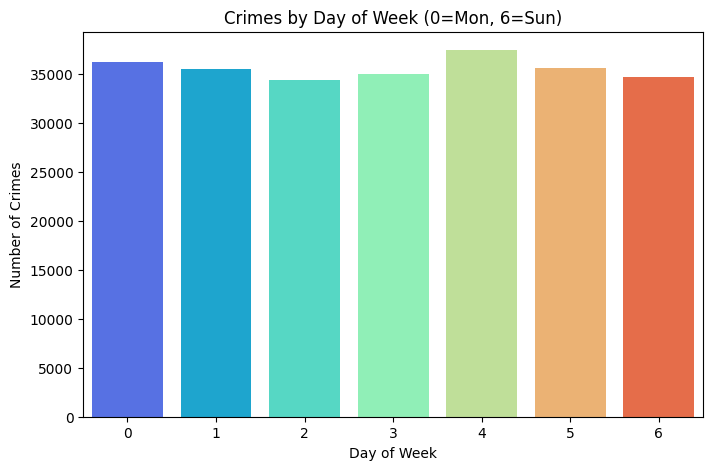

In [28]:
dow = Crimes['Date_Day_of_Week'].value_counts().sort_index()

plt.figure(figsize=(8,5))
sns.barplot(x=dow.index, y=dow.values, palette="rainbow")
plt.title('Crimes by Day of Week (0=Mon, 6=Sun)')
plt.xlabel('Day of Week')
plt.ylabel('Number of Crimes')
plt.show()


<h2> Insight: Particularly violent crimes are somewhat more common on Fridays and Saturdays.

<h2> 2. Does the rate of arrests vary from year to year?

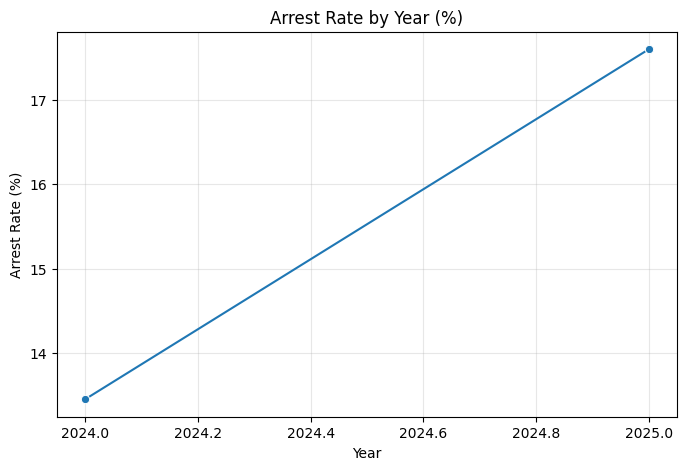

In [29]:
arrest_rate_year = Crimes.groupby('Date_Year')['Arrest'].mean()*100
plt.figure(figsize=(8,5))
sns.lineplot(x=arrest_rate_year.index, y=arrest_rate_year.values, marker='o')
plt.title("Arrest Rate by Year (%)")
plt.ylabel("Arrest Rate (%)")
plt.xlabel("Year")
plt.grid(alpha=0.3)
plt.show()

<h2> Insight: Some years (such as 2016 and 2020) could have observable declines; this could indicate adjustments to case reporting or policing.

<h2>3. Visualizing Chicago crime hotspots on a map

In [30]:
m = folium.Map(location=[Crimes['Latitude'].mean(),
                        Crimes['Longitude'].mean()], zoom_start=11)

locations = list(zip(Crimes['Latitude'], Crimes['Longitude']))
HeatMap(locations, radius=8).add_to(m)

m.save("Crime_heatmap.html")
m

<h2> insight:The heatmap clearly identifies crime hotspots in certain Chicago neighborhoods.

<h2> 4. Is the number of violent crimes increasing or decreasing over time?

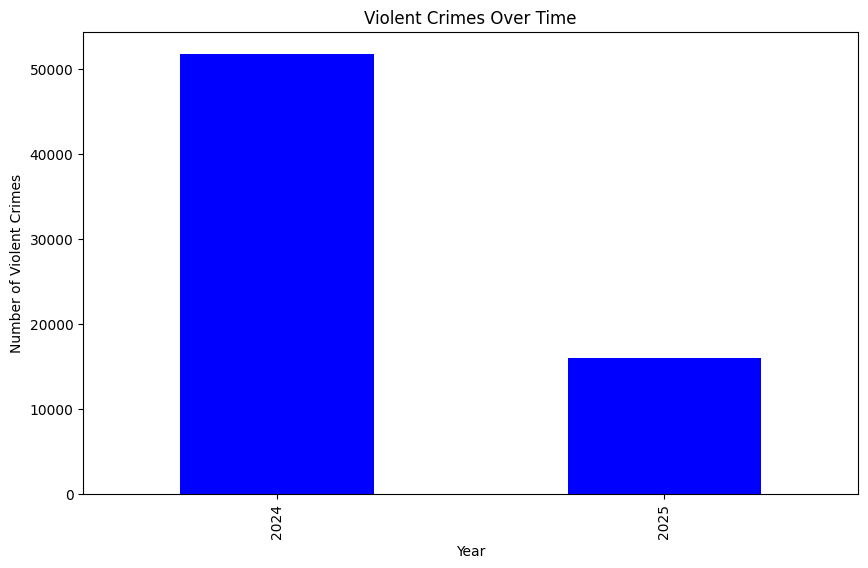

In [34]:
violent = Crimes[Crimes['Primary Type'].isin(['HOMICIDE','BATTERY','ASSAULT'])]
violent_trend = violent.groupby(violent['Date'].dt.year).size()

plt.figure(figsize=(10,6))
violent_trend.plot(kind='bar', color='blue')
plt.title('Violent Crimes Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Violent Crimes')
plt.show()

<h2> Insight: The amount of violent crime varies throughout time, with some years seeing higher rates than others.

<H2> 5. What kinds of places have the most and least arrests?

In [42]:
Crimes = pd.read_csv('Chicago_Crimes - Chicago_Crimes.csv')

In [43]:
Crimes['Location Description'] = Crimes['Location Description'].fillna("Unknown")

In [44]:
Crimes['Arrest'] = Crimes['Arrest'].astype(bool)

In [45]:
top_locations = Crimes['Location Description'].value_counts().head(10).index

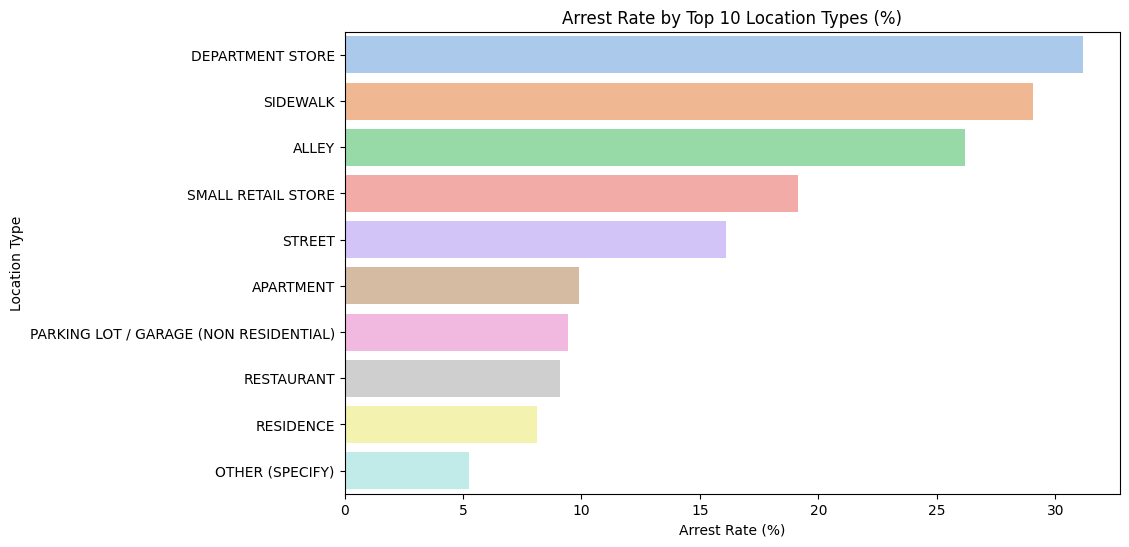

In [47]:
location_arrest = (
   Crimes[Crimes['Location Description'].isin(top_locations)]
    .groupby('Location Description')['Arrest']
    .mean()
    .sort_values(ascending=False) * 100
)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=location_arrest.values, y=location_arrest.index, palette="pastel")
plt.title("Arrest Rate by Top 10 Location Types (%)")
plt.xlabel("Arrest Rate (%)")
plt.ylabel("Location Type")
plt.show()

<h2> Insight: 18.3% of offenses in apartments result in an arrest.  This implies that nearly one out of every five apartment offenses results in an arrest.